Preprocessing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re

# Define the regular expression pattern that matches the separator between values
pattern = r'\s+'

In [3]:
df = pd.read_csv("Vertebral_column_3C.dat", header=None, names=['pelvic incidence','pelvic tilt',
           ' lumbar lordosis angle',' sacral slope',
           'pelvic radius', ' grade of spondylolisthesis', 
           'Class label'], sep=pattern)

In [4]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


In [5]:
y=df['Class label']

In [6]:
y.head()

0    DH
1    DH
2    DH
3    DH
4    DH
Name: Class label, dtype: object

In [7]:
x = df.drop(df.columns[6], axis=1)

In [8]:
x.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


In [9]:
y_logit = y.replace(['DH', 'SL'], 'Abnormal')

In [10]:
y_logit.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Class label, dtype: object

In [11]:
y_logit.tail()

305    NO
306    NO
307    NO
308    NO
309    NO
Name: Class label, dtype: object

In [12]:
mapping = {'Abnormal': 0, 'NO': 1}

# Use the map method to replace the original class labels with the desired labels
y=y_logit.map(mapping)

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class label, dtype: int64

In [14]:
#The np.unique(y) function returned the three unique class labels
print('Class label:', np.unique(y))

Class label: [0 1]


In [15]:
#split data into a training set (70%) and a testing set (30%)
#Using such a fixed random_state ensures that our results are reproducible.
#Stratifying to ensure that the division is done in same proportions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1,stratify=y)

In [16]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [210 100]
Labels counts in y_two_train: [147  70]
Labels counts in y_two_test: [63 30]


In [17]:
#standardize features
#Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) 
#and 𝜎 (standard deviation), for each feature dimension from the training data. 
#By calling the transform method, we then standardized
#the training data using those estimated parameters, 𝜇 and 𝜎 .
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

1- Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC=RandomForestClassifier(max_depth=6, n_estimators=1000)
RFC.fit(X_train_std, y_train)
y_pred = RFC.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 12
Accuracy: 0.871


In [78]:
n_estimators=[10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
Accuracy_2=[]
for n in n_estimators:
    RFC_2=RandomForestClassifier(max_depth=6, n_estimators=n)
    RFC_2.fit(X_train_std, y_train)
    y_pred2 = RFC_2.predict(X_test_std)
    Accuracy_2.append(accuracy_score(y_test, y_pred2))
    #Accuracy Scores
    print('Accuracy2: %.3f' % accuracy_score(y_test, y_pred2))
    

Accuracy2: 0.828
Accuracy2: 0.828
Accuracy2: 0.860
Accuracy2: 0.860
Accuracy2: 0.849
Accuracy2: 0.839
Accuracy2: 0.849
Accuracy2: 0.860
Accuracy2: 0.860
Accuracy2: 0.839
Accuracy2: 0.849
Accuracy2: 0.860
Accuracy2: 0.860
Accuracy2: 0.860


In [79]:
Accuracy_2

[0.8279569892473119,
 0.8279569892473119,
 0.8602150537634409,
 0.8602150537634409,
 0.8494623655913979,
 0.8387096774193549,
 0.8494623655913979,
 0.8602150537634409,
 0.8602150537634409,
 0.8387096774193549,
 0.8494623655913979,
 0.8602150537634409,
 0.8602150537634409,
 0.8602150537634409]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


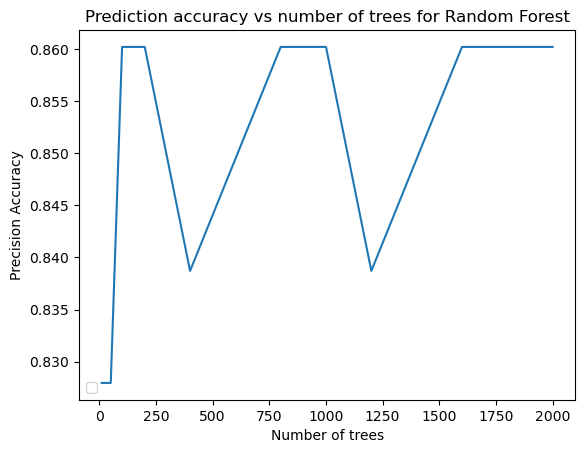

In [80]:
#Prediction accuracy vs number of trees plot for Random Forest

plt.plot(n_estimators, Accuracy_2)
plt.xlabel('Number of trees')
plt.ylabel('Precision Accuracy')
plt.title('Prediction accuracy vs number of trees for Random Forest')
plt.legend(loc="lower left")
plt.show()


In [33]:
#10-fold CV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV, KFold

param_grid= {'max_depth':[5, 6, 7, 8], 'n_estimators':[100, 400, 1000, 1500]}

cv=KFold(n_splits=10)
grid_search=GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
grid_search.fit(X_train_std,y_train)

print('Best score', grid_search.best_score_)
print('Best Hyperparameter', grid_search.best_params_)

Best score 0.8668831168831168
Best Hyperparameter {'max_depth': 5, 'n_estimators': 1500}


In [34]:
RFC_3=RandomForestClassifier(max_depth=5, n_estimators=1500)
RFC_3.fit(X_train_std, y_train)
y_pred3 = RFC_3.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred3).sum())

#Accuracy Score
print('Accuracy2: %.3f' % accuracy_score(y_test, y_pred3))

Misclassified examples: 13
Accuracy2: 0.860


2-AdaBoost

In [35]:
#AdaBoost with 500 trees and learning rate of 0.1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
AdaBoostC=AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1)
AdaBoostC.fit(X_train_std, y_train)
y_pred4 = AdaBoostC.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred4).sum())

#Accuracy Score
print('Accuracy4: %.3f' % accuracy_score(y_test, y_pred4))

Misclassified examples: 11
Accuracy4: 0.882


In [81]:
#AdaBoost with number of trees = [10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400,1600, 1800, 2000], and learning rate of 0.1

n_estimators=[10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
Accuracy_5=[]
for n in n_estimators:
    AdaBoostC_2=AdaBoostClassifier(base_estimator=tree, n_estimators=n, learning_rate=0.1)
    AdaBoostC_2.fit(X_train_std, y_train)
    y_pred5 = AdaBoostC_2.predict(X_test_std)
    Accuracy_5.append(accuracy_score(y_test, y_pred5))
    #Accuracy Scores
    print('Accuracy5: %.3f' % accuracy_score(y_test, y_pred5))

Accuracy5: 0.817
Accuracy5: 0.817
Accuracy5: 0.806
Accuracy5: 0.839
Accuracy5: 0.839
Accuracy5: 0.796
Accuracy5: 0.839
Accuracy5: 0.839
Accuracy5: 0.839
Accuracy5: 0.828
Accuracy5: 0.839
Accuracy5: 0.817
Accuracy5: 0.796
Accuracy5: 0.806


In [82]:
Accuracy_5

[0.8172043010752689,
 0.8172043010752689,
 0.8064516129032258,
 0.8387096774193549,
 0.8387096774193549,
 0.7956989247311828,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8279569892473119,
 0.8387096774193549,
 0.8172043010752689,
 0.7956989247311828,
 0.8064516129032258]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


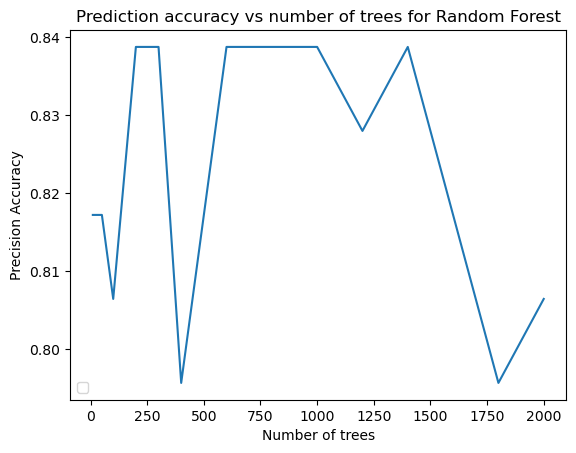

In [83]:
#Prediction accuracy vs number of trees plot for AdaBoost

plt.plot(n_estimators, Accuracy_5)
plt.xlabel('Number of trees')
plt.ylabel('Precision Accuracy')
plt.title('Prediction accuracy vs number of trees for AdaBoost')
plt.legend(loc="lower left")
plt.show()

In [37]:
#10-fold CV for Ada Boost Classifier
from sklearn.model_selection import GridSearchCV, KFold

param_grid= {'n_estimators': [100, 400, 1000, 1500]}
tree=DecisionTreeClassifier(max_depth=5)
cv=KFold(n_splits=10)

grid_search=GridSearchCV(AdaBoostClassifier(base_estimator=tree), param_grid=param_grid, cv=cv)
grid_search.fit(X_train_std,y_train)

print('Best score', grid_search.best_score_)
print('Best Hyperparameter', grid_search.best_params_)

Best score 0.8534632034632035
Best Hyperparameter {'n_estimators': 1000}


In [44]:
#AdaBoost with n trees and learning rate of 0.1
AdaBoostC_3=AdaBoostClassifier(base_estimator=tree, n_estimators=1000, learning_rate=0.1)
AdaBoostC_3.fit(X_train_std, y_train)
y_pred6 = AdaBoostC_3.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred6).sum())

#Accuracy Score
print('Accuracy6: %.3f' % accuracy_score(y_test, y_pred6))

Misclassified examples: 15
Accuracy6: 0.839


3- Gradient Boosting

In [84]:
#Gradient Boosting with max depth = 6 , learning rate = 0.01 and number of trees = n
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb

Accuracy_7=[]

for n in n_estimators:
    model= xgb.XGBClassifier(n_estimators= n, learning_rate=0.01, max_depth=6)
    model.fit(X_train_std, y_train)
    y_pred7 = model.predict(X_test_std)
    Accuracy_7.append(accuracy_score(y_test, y_pred7))
    #Accuracy Scores
    print('Accuracy7: %.3f' % accuracy_score(y_test, y_pred7))


Accuracy7: 0.817
Accuracy7: 0.860
Accuracy7: 0.860
Accuracy7: 0.849
Accuracy7: 0.839
Accuracy7: 0.849
Accuracy7: 0.839
Accuracy7: 0.849
Accuracy7: 0.839
Accuracy7: 0.839
Accuracy7: 0.839
Accuracy7: 0.839
Accuracy7: 0.839
Accuracy7: 0.839


In [85]:
Accuracy_7

[0.8172043010752689,
 0.8602150537634409,
 0.8602150537634409,
 0.8494623655913979,
 0.8387096774193549,
 0.8494623655913979,
 0.8387096774193549,
 0.8494623655913979,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


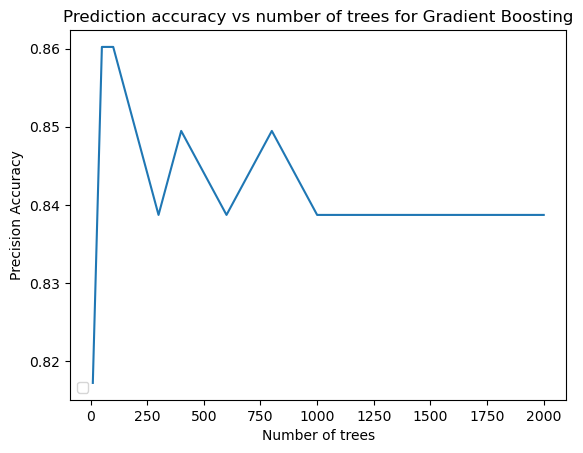

In [86]:
#Prediction accuracy vs number of trees plot for Gradient Boosting

plt.plot(n_estimators, Accuracy_7)
plt.xlabel('Number of trees')
plt.ylabel('Precision Accuracy')
plt.title('Prediction accuracy vs number of trees for Gradient Boosting')
plt.legend(loc="lower left")
plt.show()

In [46]:
#10-fold CV for Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV, KFold

param_grid= {'n_estimators': [100, 400, 1000, 1500], 'max_depth':[5, 6, 7,8]}
cv=KFold(n_splits=10)

grid_search=GridSearchCV(xgb.XGBClassifier(), param_grid=param_grid, cv=cv)
grid_search.fit(X_train_std,y_train)

print('Best score', grid_search.best_score_)
print('Best Hyperparameter', grid_search.best_params_)

Best score 0.8253246753246752
Best Hyperparameter {'max_depth': 5, 'n_estimators': 100}


In [50]:
model2= xgb.XGBClassifier(n_estimators= 100, learning_rate=0.01, max_depth=5)
model2.fit(X_train_std, y_train)
y_pred8 = model2.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred8).sum())

#Accuracy Score
print('Accuracy8: %.3f' % accuracy_score(y_test, y_pred8))

Misclassified examples: 13
Accuracy8: 0.860
